In [85]:
pip install -r requirements.text

  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/362.9 kB ? eta -:--:--
   ---- ----------------------------------- 41.0/362.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  358.4/362.9 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 362.9/362.9 kB 4.5 MB/s eta 0:00:00
Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
   ---------------------------------------- 0.0/189.7 kB ? eta -:--:--
   ---------------------------------------- 189.7/189.7 kB 5.8 MB/s eta 0:00:00
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('output.csv')

# Count the number of rows with the same subject_name
subject_name_counts = df['subject_name'].value_counts()


topic_name_counts = df['topic_name'].value_counts()

# Print the result
subject_name_counts

subject_name
Medicine                        17887
Surgery                         16862
Pathology                       14884
Anatomy                         14560
Pharmacology                    13758
Social & Preventive Medicine    11882
Microbiology                    11314
Gynaecology & Obstetrics        10013
Dental                           8938
Physiology                       8830
Biochemistry                     8282
Pediatrics                       8037
Ophthalmology                    6932
Forensic Medicine                5900
ENT                              4919
Psychiatry                       4442
Radiology                        4395
Anaesthesia                      3172
Unknown                          3045
Orthopaedics                     2999
Skin                             1771
Name: count, dtype: int64

In [114]:
biochemistry_df = df[(df['subject_name']=='Biochemistry') & (df['choice_type']=='single')]

# Save the new DataFrame to a CSV file (if needed)
biochemistry_df.to_csv('biochemistry_data.csv', index=False)

# print the new DataFrame to verify
biochemistry_df.head()

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type
1,Which vitamin is supplied from only animal sou...,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,3,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,Biochemistry,Vitamins and Minerals,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,single
48,In chronic alcoholism the rate limiting compon...,Ans : B (NAD+) & C (NADPH) In chronic alcoholi...,2,NADP,NAD+,NADPH,FADH,Biochemistry,Biosynthesis of Fatty Acids and Eicosanoids,b801715b-75b9-41bd-8f3c-828469d01266,single
107,Which of the following is the main enzyme resp...,Xenobiotics are compounds which may be acciden...,1,Cytochrome P-450,Glucuronyl transferase,Glutathione S-transferase,NADPH cytochrome P-450-reductase,Biochemistry,NaN,053c4aff-1541-4fbd-8f3c-32fa0921e82a,single
108,In Familial hypercholesterolemia there is defi...,LDL receptors \n\nFamilial hypercholesterolemi...,1,LDL receptor,Apoprotein A,Apo protein C,Lipoprotein lipase,Biochemistry,NaN,fabc62e9-fb0e-472f-b241-0c4bcf67fb58,single
115,Which of the following vitamin reduces the ris...,Higher Intakes of Vitamin D May Be Beneficial ...,3,Vitamin A,Vitamin C,Vitamin D,Vitamin B12,Biochemistry,vitamins,d1fd564a-489c-4075-9f2d-fe1fcf5a93b3,single


In [115]:
biochemistry_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5981 entries, 1 to 182813
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question      5981 non-null   object
 1   exp           5694 non-null   object
 2   cop           5981 non-null   int64 
 3   opa           5981 non-null   object
 4   opb           5981 non-null   object
 5   opc           5981 non-null   object
 6   opd           5981 non-null   object
 7   subject_name  5981 non-null   object
 8   topic_name    3503 non-null   object
 9   id            5981 non-null   object
 10  choice_type   5981 non-null   object
dtypes: int64(1), object(10)
memory usage: 560.7+ KB


In [116]:
biochemistry_df.dropna(inplace=True)

C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\1667235286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biochemistry_df.dropna(inplace=True)


In [117]:
topic_count = biochemistry_df['topic_name'].value_counts()
topic_count = topic_count[(topic_count >= 10) & (topic_count <= 20)]
topic_count

topic_name
DNA Replication                                   20
Mechanisms of Enzyme Action                       20
Membrane Structure & Function                     19
Miscellaneous                                     19
NEET 2019                                         18
Urea cycle                                        17
FMGE 2019                                         16
Structure & Function of Protein                   16
Glycogen                                          16
TCA Cycle                                         15
Metabolism of Purines and Pyrimidines             14
Chemistry of Lipids                               14
membrane structure and function                   14
DNB 2018                                          13
Nucleotides                                       13
Biosynthesis of Fatty Acids and Eicosanoids       13
FMGE 2018                                         13
Replication                                       12
Basics of DNA                      

In [118]:
topics_20 = topic_count[topic_count == 20].index.tolist()
topics_19 = topic_count[topic_count == 19].index.tolist()
topics_18 = topic_count[topic_count == 18].index.tolist()
topics_17 = topic_count[topic_count == 17].index.tolist()
topics_12 = topic_count[topic_count == 12].index.tolist()
topics_11 = topic_count[topic_count == 11].index.tolist()
topics_10 = topic_count[topic_count == 10].index.tolist()

In [119]:
# Select the required number of topics from each count category
selected_topics = []
selected_topics.extend(topics_20[:2])
selected_topics.extend(topics_19[:1])
selected_topics.extend(topics_18[:1])
selected_topics.extend(topics_17[:1])
selected_topics.extend(topics_12[:3])
selected_topics.extend(topics_11[:4])
selected_topics.extend(topics_10[:3])

In [120]:
train_df = biochemistry_df[biochemistry_df['topic_name'].isin(selected_topics)]
train_df.to_csv('train_ds.csv', index=False)
train_df.head()

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single
5693,Delta bilirubin is ______ bilirubin _____ boun...,Delta bilirubin or biliprotein is the fraction...,1,"Conjugated, covalently","Unconjugated, non-covalently","Conjugated, noncovalently","Unconjugated, covalently",Biochemistry,HAEM synth and porphyrias,8f33fa27-fc5d-40c7-a7cd-5aaeb247ad89,single
6169,What is the function of DNA ligase ?,"Ans. is 'b* i.e., Seals the single strand nick...",2,Unwinding (denaturation) of dsDNA to provide a...,Seals the single strand nick between the nasce...,Initiation of DNA synthesis and elongation,Initiates synthesis of RNA primers,Biochemistry,DNA Replication,fc63a9c7-7582-4fa0-aab7-60f59bed1bc5,single
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...","Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...",2,6,9,12,15,Biochemistry,Kerbs Cycle,23bbeaa8-bf60-4ab5-a9cb-270f7941006e,single
9275,Ammonia is detoxified in brain by formation of,The transpo form of Ammonia in blood and from ...,3,Glutamate,Uric acid,Glutamine,Urea,Biochemistry,Urea cycle,c47357ef-9bb6-4ba7-8d54-5d5f552ea814,single


In [121]:
import numpy as np
import random

random_seed = 57
np.random.seed(random_seed)
random.seed(random_seed)

# Define a mapping for the answer options
answer_mapping = {1: 'opa', 2: 'opb', 3: 'opc', 4: 'opd'}

# Function to get an incorrect answer
def get_incorrect_answer(correct_option):
    # incorrect_options = [key for key in answer_mapping.values() if key != correct_option]
    # return answer_mapping.index(np.random.choice(incorrect_options))
    incorrect = (correct_option + 1) % (len(answer_mapping.keys()) + 1)
    incorrect = incorrect + 1 if incorrect == 0 else incorrect
    assert correct_option != incorrect
    return incorrect

# Update user_answer to ensure it matches the correct answer 90% of the time
wrong_probability = 0.1
train_df['user_ans'] = train_df.apply(
    lambda row: row['cop'] if np.random.rand() > wrong_probability else
                get_incorrect_answer(row['cop']), axis=1
                # answer_mapping[np.random.choice([1, 2, 3, 4])], axis=1
).astype('int64')

# Save the updated DataFrame to a new CSV file
train_df.to_csv('train_data.csv', index=False)

# Print the new DataFrame to verify
display(train_df.head())
display(train_df.info())


C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\180821998.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['user_ans'] = train_df.apply(


,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type,user_ans
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single,2
5693,Delta bilirubin is ______ bilirubin _____ boun...,Delta bilirubin or biliprotein is the fraction...,1,"Conjugated, covalently","Unconjugated, non-covalently","Conjugated, noncovalently","Unconjugated, covalently",Biochemistry,HAEM synth and porphyrias,8f33fa27-fc5d-40c7-a7cd-5aaeb247ad89,single,1
6169,What is the function of DNA ligase ?,"Ans. is 'b* i.e., Seals the single strand nick...",2,Unwinding (denaturation) of dsDNA to provide a...,Seals the single strand nick between the nasce...,Initiation of DNA synthesis and elongation,Initiates synthesis of RNA primers,Biochemistry,DNA Replication,fc63a9c7-7582-4fa0-aab7-60f59bed1bc5,single,2
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...","Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...",2,6,9,12,15,Biochemistry,Kerbs Cycle,23bbeaa8-bf60-4ab5-a9cb-270f7941006e,single,2
9275,Ammonia is detoxified in brain by formation of,The transpo form of Ammonia in blood and from ...,3,Glutamate,Uric acid,Glutamine,Urea,Biochemistry,Urea cycle,c47357ef-9bb6-4ba7-8d54-5d5f552ea814,single,3


<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 808 to 181612
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question      204 non-null    object
 1   exp           204 non-null    object
 2   cop           204 non-null    int64 
 3   opa           204 non-null    object
 4   opb           204 non-null    object
 5   opc           204 non-null    object
 6   opd           204 non-null    object
 7   subject_name  204 non-null    object
 8   topic_name    204 non-null    object
 9   id            204 non-null    object
 10  choice_type   204 non-null    object
 11  user_ans      204 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 20.7+ KB


None

In [122]:
# Calculate the number of matching values
matching_count = (train_df['cop'] == train_df['user_ans']).sum()

# Calculate the total number of rows
total_count = len(train_df)

# Calculate the percentage of matching values
percentage_matching = (matching_count / total_count) * 100

# Print the result
display(f"Percentage of matching values: {percentage_matching:.2f}%")


'Percentage of matching values: 90.20%'

In [123]:
# Define the mapping from strings to numbers
# answer_mapping = {'opa': 1, 'opb': 2, 'opc': 3, 'opd': 4}

# Replace the string values in 'user_ans' with their corresponding numeric values
# train_df['user_ans'] = train_df['user_ans'].replace(answer_mapping)

# # Verify the changes
# display(train_df.head())
# display(train_df['user_ans'].unique())  # Check unique values in the user_ans column


In [124]:
train_df.head()

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type,user_ans
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single,2
5693,Delta bilirubin is ______ bilirubin _____ boun...,Delta bilirubin or biliprotein is the fraction...,1,"Conjugated, covalently","Unconjugated, non-covalently","Conjugated, noncovalently","Unconjugated, covalently",Biochemistry,HAEM synth and porphyrias,8f33fa27-fc5d-40c7-a7cd-5aaeb247ad89,single,1
6169,What is the function of DNA ligase ?,"Ans. is 'b* i.e., Seals the single strand nick...",2,Unwinding (denaturation) of dsDNA to provide a...,Seals the single strand nick between the nasce...,Initiation of DNA synthesis and elongation,Initiates synthesis of RNA primers,Biochemistry,DNA Replication,fc63a9c7-7582-4fa0-aab7-60f59bed1bc5,single,2
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...","Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...",2,6,9,12,15,Biochemistry,Kerbs Cycle,23bbeaa8-bf60-4ab5-a9cb-270f7941006e,single,2
9275,Ammonia is detoxified in brain by formation of,The transpo form of Ammonia in blood and from ...,3,Glutamate,Uric acid,Glutamine,Urea,Biochemistry,Urea cycle,c47357ef-9bb6-4ba7-8d54-5d5f552ea814,single,3


In [125]:
train_df.to_csv('train_data.csv', index=False)

In [126]:
# Display rows where 'cop' and 'user_ans' do not match
wrong_ans = train_df[train_df['cop'] != train_df['user_ans']]
wrong_ans.head()

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type,user_ans
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single,2
16612,Telomerases are:,Telomerases are RNA dependent DNA polymerase. ...,2,DNA dependent DNA polymerase,RNA dependent DNA polymerase,DNA dependent RNA polymerase,RNA dependent RNA polymerase,Biochemistry,Replication,826f7e32-cb46-4694-84a4-587c88133b93,single,3
22512,"Replacing alanine by which amino acid, will in...",Aromatic side chains are responsible for the U...,1,Tryptophan,Arginine,Guanine,Lysine,Biochemistry,NEET Jan 2020,0ca57571-24a8-4c57-ac0a-2c3f6c3f292a,single,2
25955,The vitamin used for transamination is :,Ans. is 'a' i.e. Pyridoxal phosphate : Transam...,1,Pyridoxal phosphate,Riboflavin,Thiamine,Cyanocobalamine.,Biochemistry,Mechanisms of Enzyme Action,b296f6ef-345c-4bc8-8721-650570bacdad,single,2
28012,Heme is which porphyrin:,The side chain groups in porphyrins may be arr...,3,Type I,Type II,Type III,Type IV,Biochemistry,HAEM synth and porphyrias,5bbf7ffe-ead0-4ee6-98a7-27a374cf8d7d,single,4


In [127]:
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def extract_keywords(text):
    doc = nlp(text)
    keywords = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ'] and token.is_stop == False]
    return keywords

train_df['q_keywords'] = train_df['question'].apply(extract_keywords)
train_df['e_keywords'] = train_df['exp'].apply(extract_keywords)
train_df

C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\937519537.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['q_keywords'] = train_df['question'].apply(extract_keywords)
C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\937519537.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['e_keywords'] = train_df['exp'].apply(extract_keywords)


,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type,user_ans,q_keywords,e_keywords
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single,2,"[type, collagen, maximum, skin:-]","[collagen, abundant, protein, mammal, contain,..."
5693,Delta bilirubin is ______ bilirubin _____ boun...,Delta bilirubin or biliprotein is the fraction...,1,"Conjugated, covalently","Unconjugated, non-covalently","Conjugated, noncovalently","Unconjugated, covalently",Biochemistry,HAEM synth and porphyrias,8f33fa27-fc5d-40c7-a7cd-5aaeb247ad89,single,1,"[bilirubin, bind, albumin]","[bilirubin, fraction, conjugate, bilirubin, bi..."
6169,What is the function of DNA ligase ?,"Ans. is 'b* i.e., Seals the single strand nick...",2,Unwinding (denaturation) of dsDNA to provide a...,Seals the single strand nick between the nasce...,Initiation of DNA synthesis and elongation,Initiates synthesis of RNA primers,Biochemistry,DNA Replication,fc63a9c7-7582-4fa0-aab7-60f59bed1bc5,single,2,"[function, ligase]","[single, polymerasesdeoxynucieotide, polymeriz..."
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...","Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...",2,6,9,12,15,Biochemistry,Kerbs Cycle,23bbeaa8-bf60-4ab5-a9cb-270f7941006e,single,2,[generate],"[o, produce, ATP, produce, ATP, produce, atp.o..."
9275,Ammonia is detoxified in brain by formation of,The transpo form of Ammonia in blood and from ...,3,Glutamate,Uric acid,Glutamine,Urea,Biochemistry,Urea cycle,c47357ef-9bb6-4ba7-8d54-5d5f552ea814,single,3,"[detoxify, brain, formation]","[transpo, form, blood, muscle, answer, glutama..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,Vitamin A is stored in:-,HSCs (Hepatic Stellate Cells) are: Pericytes w...,3,Kupfer cells,Hepatocytes,Ito cells,Endothelial cells of liver,Biochemistry,NEET 2019,b5988495-d56c-42ab-a01d-3a769711b7cf,single,3,"[vitamin, store]","[exist, space, parenchymal, cell, liver, sinus..."
180223,DNA replication and transcription occurs in wh...,"Ans. is 'a' i.e., 51 - 31 Elongation in DNA sy...",1,51-31,5l-51,31 -51,31 -31,Biochemistry,DNA Replication,1d59dd69-b8cc-4f7e-baaa-21447e735f49,single,1,"[dna, replication, transcription, occur, direc...","[synthesiso, primer, synthesize, replicate, fo..."
180529,Sumoylation of histones proteins is associated...,Sumoylation of histones is associated with Tra...,3,Activation of gene transcription,Condensation of chromosome,Transcription repression,Inactivation of gene transcription,Biochemistry,Basics of DNA,0a765deb-0d9b-4b03-89a0-60cff2fe3491,single,4,"[sumoylation, histone, protein, associate]","[sumoylation, histone, associate, repression, ..."
180857,Carboxylases requires -,"Ans. is 'd' i.e., Biotin o Biotin is a coenzym...",4,Vitamin B12,Folic acid,Niacin,Biotin,Biochemistry,Mechanisms of Enzyme Action,d5d5045e-5143-462e-bbd9-ff6208dddd9a,single,4,"[carboxylase, require]","[o, coenzyme, carbon, dioxide, fixation, react..."


In [128]:
# from gensim.corpora import Dictionary
# from gensim.models.ldamodel import LdaModel

# def extract_keywords_lda(texts):
#     # Preprocessing text
#     tokenized_texts = [text.split() for text in texts]
#     dictionary = Dictionary(tokenized_texts)
#     corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

#     # Train the LDA model
#     lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=10)
#     topics = lda_model.show_topics(num_words=5)
#     keywords = [word for topic in topics for word in topic[1].split('"') if '*' not in word and len(word) > 2]
#     return keywords

# train_df['q_keywords'] = train_df['question'].apply(extract_keywords_lda)
# train_df['e_keywords'] = train_df['exp'].apply(extract_keywords_lda)
# train_df

In [65]:
# Function to vectorize the text using word embeddings (e.g., Word2Vec, GloVe, FastText)
def vectorize_text(text, model):
    return np.mean([model[word] for word in text.split() if word in model], axis=0)

# Assuming `model` is a pre-trained Word2Vec, GloVe, or FastText model loaded with Gensim
# For example, using GloVe vectors:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False)

# Apply the vectorization to the 'combined_keywords'
train_df['vectorized_keywords'] = train_df['combined_keywords'].apply(lambda x: vectorize_text(x, model))

# Drop any rows where vectorization failed (e.g., empty vectors)
train_df.dropna(subset=['vectorized_keywords'], inplace=True)

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
train_df['pca_x'] = pca.fit_transform(np.stack(train_df['vectorized_keywords'].values))[:, 0]
train_df['pca_y'] = pca.fit_transform(np.stack(train_df['vectorized_keywords'].values))[:, 1]

# Calculate the error percentage for each row (for bubble size)
train_df['error_percentage'] = train_df['wrong'] / train_df['total'] * 100

# Plot the PCA with error % as the size of the bubble
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', size='error_percentage', hue='topic_name', data=train_df, alpha=0.7, palette='viridis', sizes=(20, 200))
plt.title('Keyword Embeddings Visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [16]:
# import pandas as pd
# import textstat

# # Function to calculate the Flesch-Kincaid Grade Level
# # def calculate_complexity(text):
# #     return textstat.flesch_kincaid_grade(text)

# # Function to identify difficult words with more than 2 syllables
# def find_difficult_words(text):
#     difficult_words = [word for word in text.split() if textstat.syllable_count(word) > 2]
#     return ', '.join(difficult_words)

# # # Apply complexity calculation to 'question' and 'exp' columns
# # train_df['question_complexity'] = train_df['question'].apply(calculate_complexity)
# # train_df['exp_complexity'] = train_df['exp'].apply(calculate_complexity)

# # Identify difficult words in 'question' and 'exp' columns
# train_df['question_difficult_words'] = train_df['question'].apply(find_difficult_words)
# train_df['exp_difficult_words'] = train_df['exp'].apply(find_difficult_words)

# # Display the updated DataFrame
# display(train_df[['question', 'question_difficult_words', 'exp', 'exp_difficult_words']])


C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\4089447237.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['question_difficult_words'] = train_df['question'].apply(find_difficult_words)
C:\Users\DBANVGOYARy\AppData\Local\Temp\ipykernel_9288\4089447237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['exp_difficult_words'] = train_df['exp'].apply(find_difficult_words)


,question,question_difficult_words,exp,exp_difficult_words
808,Type of collagen maximum in skin:-,"collagen, maximum",Collagen - the most abundant protein in mammal...,"Collagen, 4-hydroxyproline, 5-hydroxylysine., ..."
5693,Delta bilirubin is ______ bilirubin _____ boun...,albumin.,Delta bilirubin or biliprotein is the fraction...,"conjugated, covalently, albumin., responsible,..."
6169,What is the function of DNA ligase ?,,"Ans. is 'b* i.e., Seals the single strand nick...","ProteinFunctionDNA, polymerasesDeoxynucieotide..."
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...",generates,"Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...","production, molecules, cycle.Energetics, molec..."
9275,Ammonia is detoxified in brain by formation of,"Ammonia, detoxified, formation",The transpo form of Ammonia in blood and from ...,"Ammonia, glutamate, ammonia, Glutamate, transa..."
...,...,...,...,...
180072,Vitamin A is stored in:-,Vitamin,HSCs (Hepatic Stellate Cells) are: Pericytes w...,"(Hepatic, Pericytes, sinusoidal, endothelial, ..."
180223,DNA replication and transcription occurs in wh...,"replication, transcription, direction","Ans. is 'a' i.e., 51 - 31 Elongation in DNA sy...","Elongation, synthesiso, synthesized, replicati..."
180529,Sumoylation of histones proteins is associated...,"Sumoylation, histones, associated",Sumoylation of histones is associated with Tra...,"Sumoylation, histones, associated, Transcripti..."
180857,Carboxylases requires -,Carboxylases,"Ans. is 'd' i.e., Biotin o Biotin is a coenzym...","fixation, reactions.o, prosthetic, ATP-depende..."


In [17]:
train_df

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type,user_ans,question_difficult_words,exp_difficult_words
808,Type of collagen maximum in skin:-,Collagen - the most abundant protein in mammal...,1,Type I,Type II,Type III,Type IV,Biochemistry,NEET 2019,592dd58a-ef4f-4259-b81d-44a5fc989338,single,2,"collagen, maximum","Collagen, 4-hydroxyproline, 5-hydroxylysine., ..."
5693,Delta bilirubin is ______ bilirubin _____ boun...,Delta bilirubin or biliprotein is the fraction...,1,"Conjugated, covalently","Unconjugated, non-covalently","Conjugated, noncovalently","Unconjugated, covalently",Biochemistry,HAEM synth and porphyrias,8f33fa27-fc5d-40c7-a7cd-5aaeb247ad89,single,1,albumin.,"conjugated, covalently, albumin., responsible,..."
6169,What is the function of DNA ligase ?,"Ans. is 'b* i.e., Seals the single strand nick...",2,Unwinding (denaturation) of dsDNA to provide a...,Seals the single strand nick between the nasce...,Initiation of DNA synthesis and elongation,Initiates synthesis of RNA primers,Biochemistry,DNA Replication,fc63a9c7-7582-4fa0-aab7-60f59bed1bc5,single,2,,"ProteinFunctionDNA, polymerasesDeoxynucieotide..."
7122,"Per TCA with 3 NADH and 1 FADH2, generates how...","Ans. is 'b' i.e., 9 o One N ADH produces 2.5 A...",2,6,9,12,15,Biochemistry,Kerbs Cycle,23bbeaa8-bf60-4ab5-a9cb-270f7941006e,single,2,generates,"production, molecules, cycle.Energetics, molec..."
9275,Ammonia is detoxified in brain by formation of,The transpo form of Ammonia in blood and from ...,3,Glutamate,Uric acid,Glutamine,Urea,Biochemistry,Urea cycle,c47357ef-9bb6-4ba7-8d54-5d5f552ea814,single,3,"Ammonia, detoxified, formation","Ammonia, glutamate, ammonia, Glutamate, transa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,Vitamin A is stored in:-,HSCs (Hepatic Stellate Cells) are: Pericytes w...,3,Kupfer cells,Hepatocytes,Ito cells,Endothelial cells of liver,Biochemistry,NEET 2019,b5988495-d56c-42ab-a01d-3a769711b7cf,single,3,Vitamin,"(Hepatic, Pericytes, sinusoidal, endothelial, ..."
180223,DNA replication and transcription occurs in wh...,"Ans. is 'a' i.e., 51 - 31 Elongation in DNA sy...",1,51-31,5l-51,31 -51,31 -31,Biochemistry,DNA Replication,1d59dd69-b8cc-4f7e-baaa-21447e735f49,single,1,"replication, transcription, direction","Elongation, synthesiso, synthesized, replicati..."
180529,Sumoylation of histones proteins is associated...,Sumoylation of histones is associated with Tra...,3,Activation of gene transcription,Condensation of chromosome,Transcription repression,Inactivation of gene transcription,Biochemistry,Basics of DNA,0a765deb-0d9b-4b03-89a0-60cff2fe3491,single,4,"Sumoylation, histones, associated","Sumoylation, histones, associated, Transcripti..."
180857,Carboxylases requires -,"Ans. is 'd' i.e., Biotin o Biotin is a coenzym...",4,Vitamin B12,Folic acid,Niacin,Biotin,Biochemistry,Mechanisms of Enzyme Action,d5d5045e-5143-462e-bbd9-ff6208dddd9a,single,4,Carboxylases,"fixation, reactions.o, prosthetic, ATP-depende..."


,total,wrong
topic_name,,
NEET 2019,18,2
HAEM synth and porphyrias,12,1
DNA Replication,20,0
Kerbs Cycle,11,1
Urea cycle,17,2
Basics of DNA,12,2
Urea Cycle and Disorders,11,1
Membrane Structure & Function,19,4
"Fuel in Fed, Fasting and Starvation",10,0


<Axes: ylabel='topic_name'>

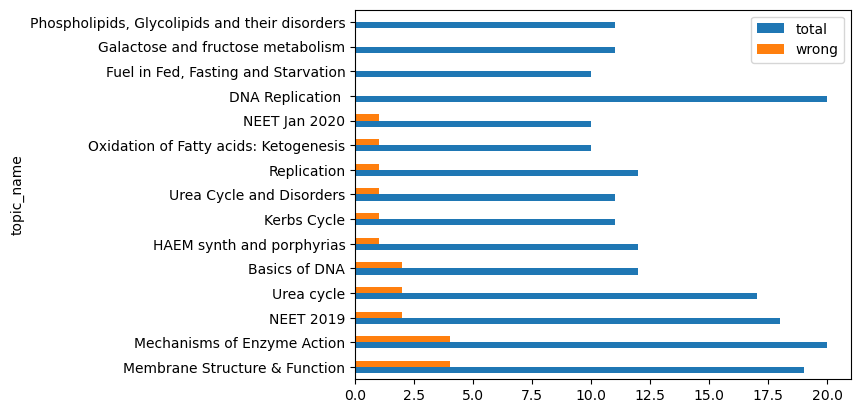

In [18]:
answer_stat = []
for topic_name in train_df['topic_name'].unique():
    tdf = train_df[train_df['topic_name'] == topic_name]
    wdf = tdf[tdf['cop'] != tdf['user_ans']]
    answer_stat.append(dict(
        topic_name=topic_name, 
        total=len(tdf), 
        wrong=len(wdf)
    ))

wndf = pd.DataFrame(answer_stat)
wndf.set_index('topic_name', inplace=True)
display(wndf)
wndf.sort_values(by=['wrong'], ascending=False).plot.barh()

In [21]:
wndf['percentage'] = wndf['wrong']/wndf['total']*100
percentage.sort_values()


topic_name
DNA Replication                                    0.000000
Fuel in Fed, Fasting and Starvation                0.000000
Galactose and fructose metabolism                  0.000000
Phospholipids, Glycolipids and their disorders     0.000000
HAEM synth and porphyrias                          8.333333
Replication                                        8.333333
Kerbs Cycle                                        9.090909
Urea Cycle and Disorders                           9.090909
Oxidation of Fatty acids: Ketogenesis             10.000000
NEET Jan 2020                                     10.000000
NEET 2019                                         11.111111
Urea cycle                                        11.764706
Basics of DNA                                     16.666667
Mechanisms of Enzyme Action                       20.000000
Membrane Structure & Function                     21.052632
dtype: float64

Text(0.5, 1.0, 'Topic vs Error %')

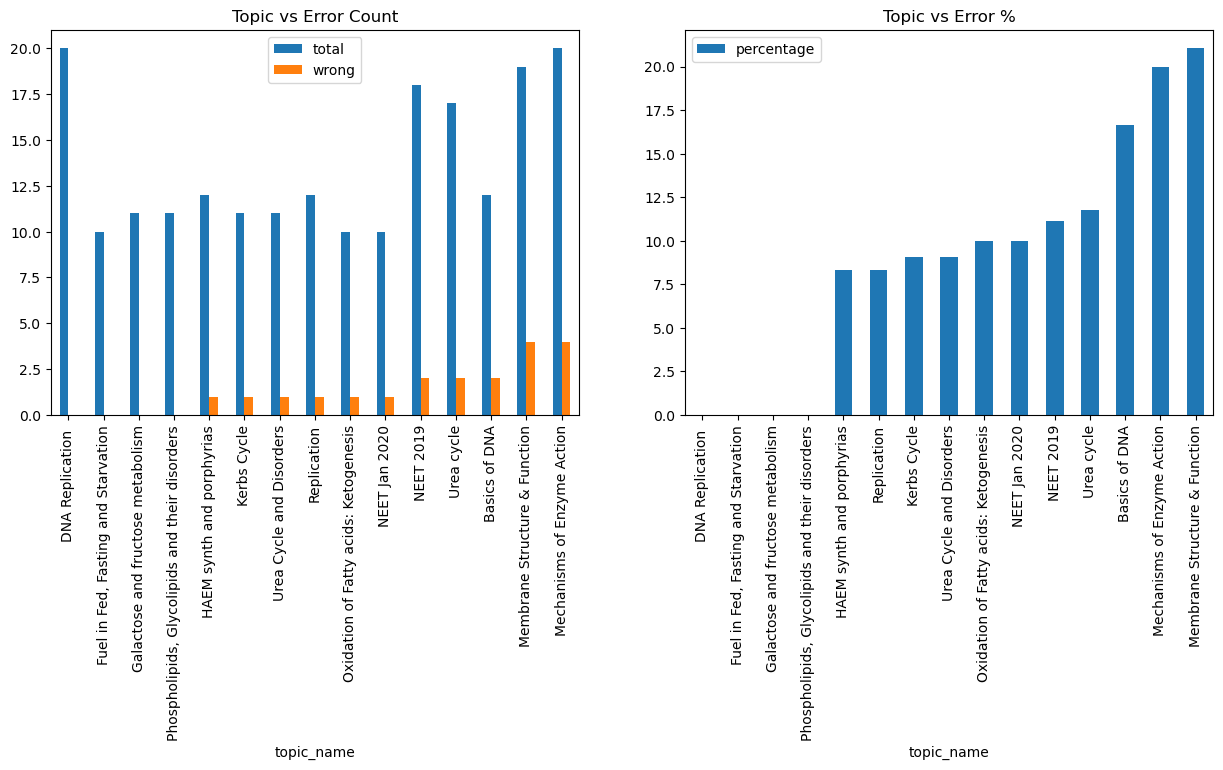

In [22]:
import matplotlib.pyplot as plt
# float("inf"), float("-inf")

plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
wndf[['total','wrong']].sort_values(by=['wrong']).plot.bar(ax=ax)
ax.set_title("Topic vs Error Count")

ax = plt.subplot(122)
wndf[['percentage']].sort_values(by=['percentage']).plot.bar(ax=ax)
ax.set_title("Topic vs Error %")